##### Import data and libraries

In [1]:
## import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\matth\05-2023 Instacart Basket Analysis'

In [4]:
## importing products merged
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_merged_280623.pkl'))

## 1. Creating Bar Charts

<Axes: >

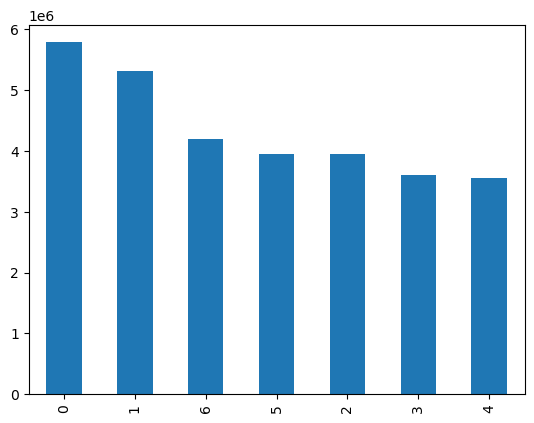

In [5]:
## create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

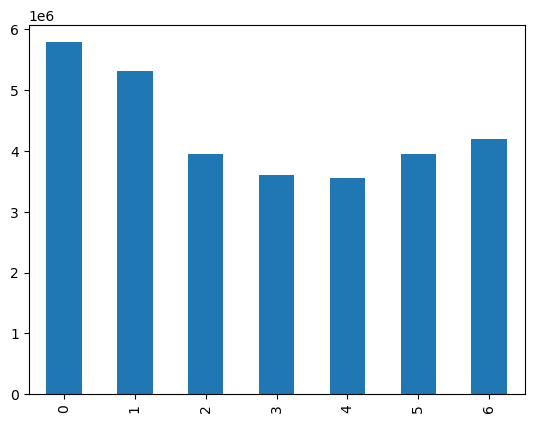

In [6]:
## create a bar chart according to index order

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
## same trick of sort index can be applied when printing frequencies

ords_prods_merge['orders_day_of_week'].value_counts()

0    5779087
1    5303718
6    4190948
5    3952326
2    3947564
3    3600589
4    3554531
Name: orders_day_of_week, dtype: int64

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    5779087
1    5303718
2    3947564
3    3600589
4    3554531
5    3952326
6    4190948
Name: orders_day_of_week, dtype: int64

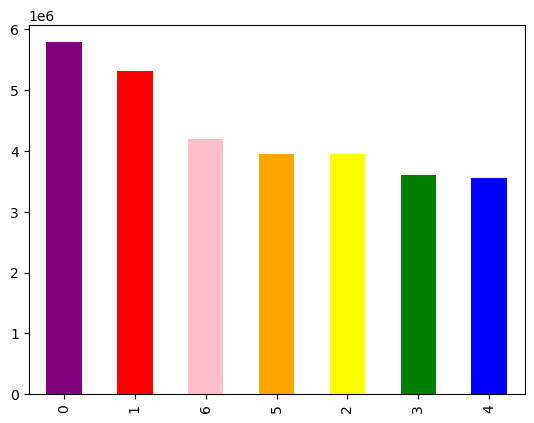

In [11]:
## adding colour to the bar chart

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple','red','pink','orange','yellow','green','blue'])

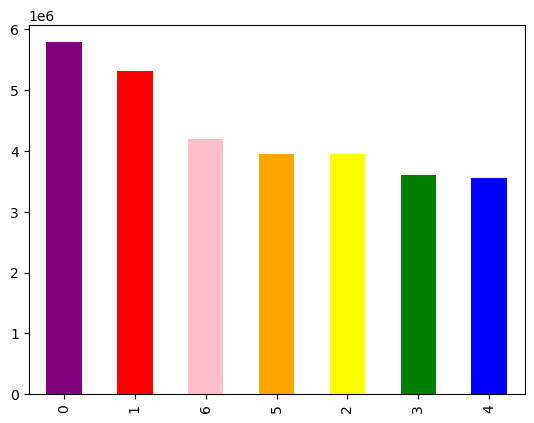

In [15]:
bar.figure

In [17]:
## exporting the chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## 2 Creating Histograms and Scatterplot

<Axes: ylabel='Frequency'>

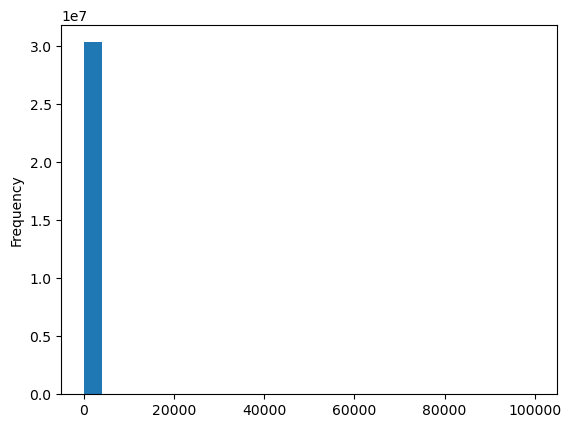

In [18]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [20]:
## data prep stage

ords_prods_merge['prices'].describe()

count    3.032876e+07
mean     1.197725e+01
std      4.963730e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [21]:
ords_prods_merge['prices'].mean()

11.977249441396609

In [22]:
ords_prods_merge['prices'].median()

7.4

In [23]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

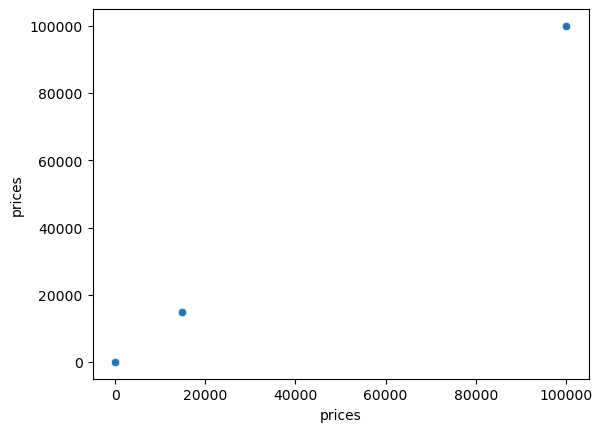

In [25]:
## creating a scatter

sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [26]:
## checking if anything is over 100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0,order_id,user_id,order_number,orders_day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busiest_period_of_day
8960343,8960343,912404,17,12,2,14,5.0,21553,5,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Most orders
8960344,8960344,603376,17,22,6,16,4.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Most orders
8960345,8960345,3264360,135,2,2,21,13.0,21553,6,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Regularly busy,Average orders
8960346,8960346,892534,135,3,0,8,12.0,21553,3,1,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Busiest day,Busiest days,Average orders
8960347,8960347,229704,342,8,1,19,30.0,21553,9,0,both,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,Regularly busy,Busiest days,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27128304,27128304,2249946,204099,29,0,8,4.0,33664,1,0,both,2 % Reduced Fat Milk,84,16,99999.0,Busiest day,Busiest days,Average orders
27128305,27128305,2363282,204099,31,0,9,2.0,33664,1,1,both,2 % Reduced Fat Milk,84,16,99999.0,Busiest day,Busiest days,Most orders
27128306,27128306,3181945,204395,13,3,15,8.0,33664,25,0,both,2 % Reduced Fat Milk,84,16,99999.0,Regularly busy,Least busy days,Most orders
27128307,27128307,2486215,205227,7,3,20,4.0,33664,8,0,both,2 % Reduced Fat Milk,84,16,99999.0,Regularly busy,Least busy days,Average orders


In [27]:
## marking those exceptional numbers as missing

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [28]:
ords_prods_merge['prices'].max()

25.0

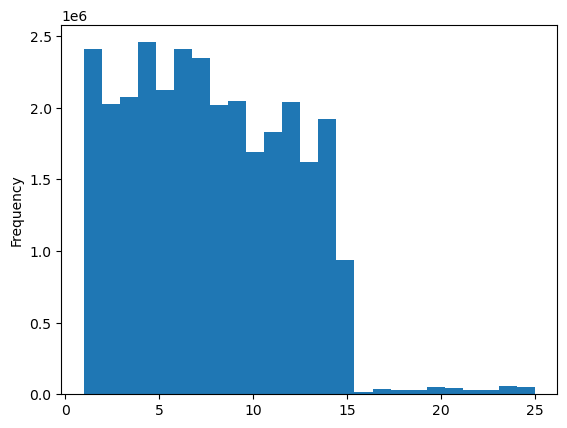

In [30]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

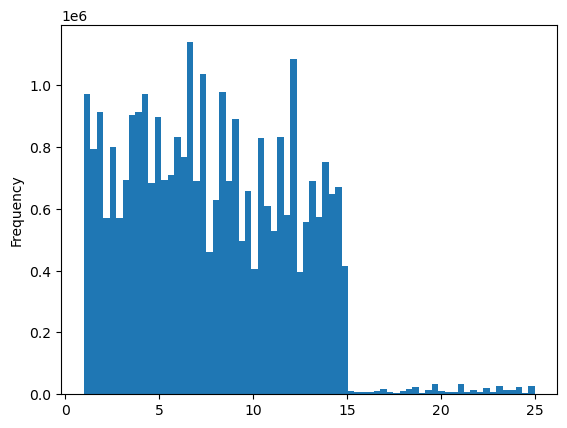

In [32]:
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [33]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_dow.png'))

In [34]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices2_dow.png'))